# Практическая работа 6

Вариант 2 (16 % 7)

Файл 1

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def gen_circle(size=50):
    img = np.zeros([size, size])
    x = np.random.randint(0, size)
    y = np.random.randint(0, size)
    r = np.random.randint(size // 10, size // 3)
    for i in range(0, size):
        for j in range(0, size):
            if (i-x)**2 + (j-y)**2 <= r**2:
                img[i, j] = 1
    return img


def gen_empty_circle(size=50):
    img = np.zeros([size, size])
    x = np.random.randint(0, size)
    y = np.random.randint(0, size)
    r = np.random.randint(size // 10, size // 3)
    dr = np.random.randint(1, 10) + r
    for i in range(0, size):
        for j in range(0, size):
            if r**2 <= (i - x) ** 2 + (j - y) ** 2 <= dr ** 2:
                img[i, j] = 1
    return img

Файл 2

In [70]:
def gen_data(size=500, img_size=50):
    c1 = size // 2
    c2 = size - c1
    label_c1 = np.full([c1, 1], 'Empty')
    data_c1 = np.array([gen_empty_circle(img_size) for i in range(c1)])
    label_c2 = np.full([c2, 1], 'Not Empty')
    data_c2 = np.array([gen_circle(img_size) for i in range(c2)])
    data = np.vstack((data_c1, data_c2))
    label = np.vstack((label_c1, label_c2))
    return data, label

Выводим данные для проверки корректности генерации

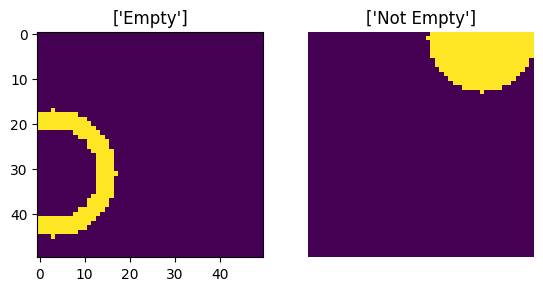

In [71]:
data, labels = gen_data()
# print(data, labels)

plt.subplot(121)
plt.imshow(data[0])
plt.title(labels[0])
plt.subplot(122)
plt.imshow(data[-1])
plt.title(labels[-1])
plt.axis("off")
plt.show()

Перемешивание данных

In [72]:
indices = np.arange(len(data))
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

Нормализируем

In [73]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels.ravel())

Разделяем выборку

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(
    data, labels, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5)

Проверяем, что все разделилось ровно

In [75]:
print(f"Train class distribution: {np.bincount(y_train)}")
print(f"Validation class distribution: {np.bincount(y_val)}")
print(f"Test class distribution: {np.bincount(y_test)}")

Train class distribution: [184 166]
Validation class distribution: [36 39]
Test class distribution: [30 45]


In [76]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

Создаем архитектуру сверточной нейронной сети

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(
        50, 50, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [78]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Добавляем Callback с ранней остановкой

In [79]:
early_stopping = EarlyStopping(
    monitor='val_loss', min_delta=0.0005, patience=5, restore_best_weights=True)

In [80]:
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val), callbacks=[early_stopping], shuffle=True)

Epoch 1/100


2024-12-23 02:03:11.507332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-23 02:03:11.652127: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


11/11 [==============================] - ETA: 0s - loss: 0.6836 - accuracy: 0.5429

2024-12-23 02:03:12.994862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 3s 112ms/step - loss: 0.6836 - accuracy: 0.5429 - val_loss: 0.6696 - val_accuracy: 0.5867
Epoch 2/100
11/11 [==============================] - 0s 31ms/step - loss: 0.6406 - accuracy: 0.6600 - val_loss: 0.6470 - val_accuracy: 0.5467
Epoch 3/100
11/11 [==============================] - 0s 37ms/step - loss: 0.5698 - accuracy: 0.6829 - val_loss: 0.5237 - val_accuracy: 0.8400
Epoch 4/100
11/11 [==============================] - 0s 31ms/step - loss: 0.4072 - accuracy: 0.8086 - val_loss: 0.3751 - val_accuracy: 0.8400
Epoch 5/100
11/11 [==============================] - 0s 31ms/step - loss: 0.3559 - accuracy: 0.8314 - val_loss: 0.4237 - val_accuracy: 0.8267
Epoch 6/100
11/11 [==============================] - 0s 31ms/step - loss: 0.2307 - accuracy: 0.9143 - val_loss: 0.1947 - val_accuracy: 0.9067
Epoch 7/100
11/11 [==============================] - 0s 31ms/step - loss: 0.1755 - accuracy: 0.9429 - val_loss: 0.1483 - val_accuracy: 0.9600
Epoch 8/100
11/11

Выводим точность

In [81]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

3/3 - 0s - loss: 0.0412 - accuracy: 0.9733 - 59ms/epoch - 20ms/step
Test accuracy: 0.9733333587646484


Визулизируем и проверяем предсказания

1/1 [==============================] - 0s 141ms/step


2024-12-23 02:03:23.154006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


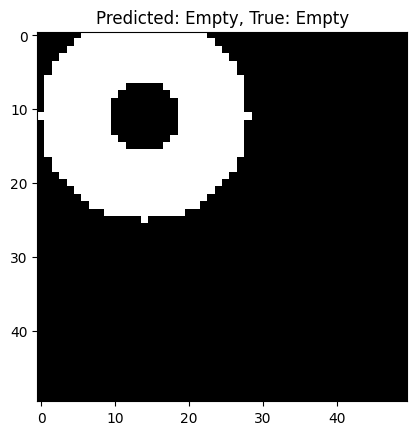

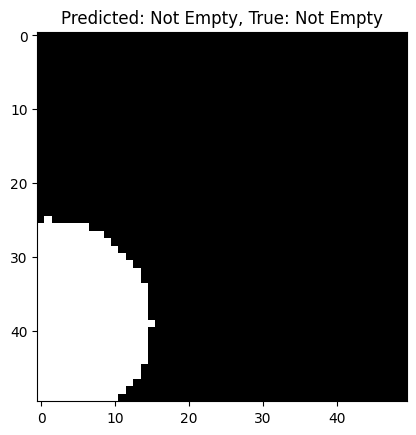

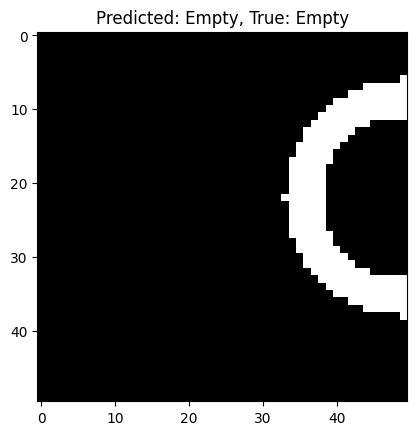

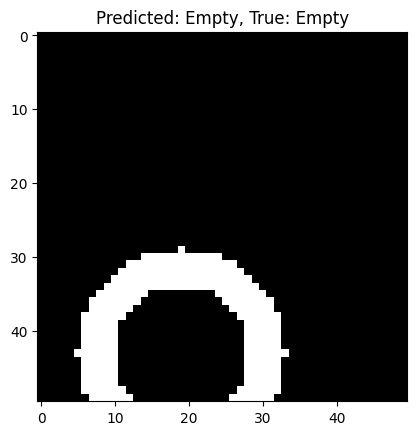

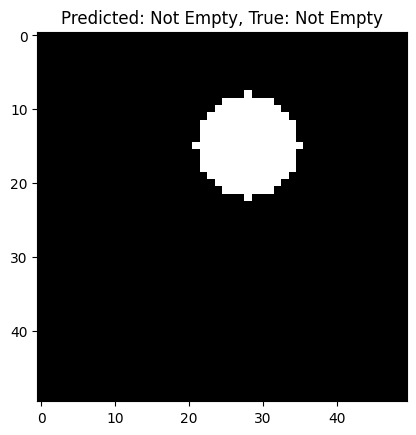

In [82]:
import matplotlib.pyplot as plt

predictions = model.predict(x_test[:5]).flatten()

for i, pred in enumerate(predictions):
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    predicted_label = 'Not Empty' if pred > 0.5 else 'Empty'
    true_label = 'Not Empty' if y_test[i] else 'Empty'
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.show()

Выводим график потерь и точности

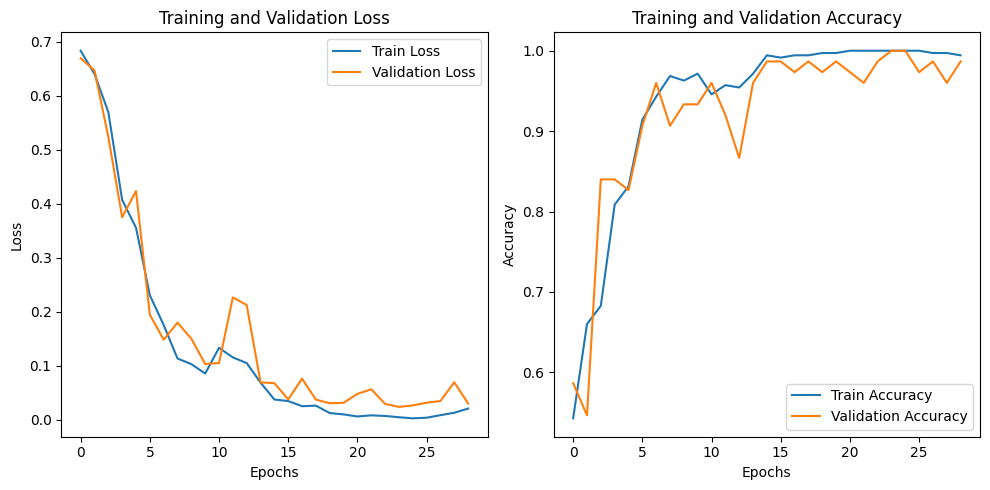

In [83]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()